In [7]:
import json
import matplotlib.pyplot as plt
import numpy as np


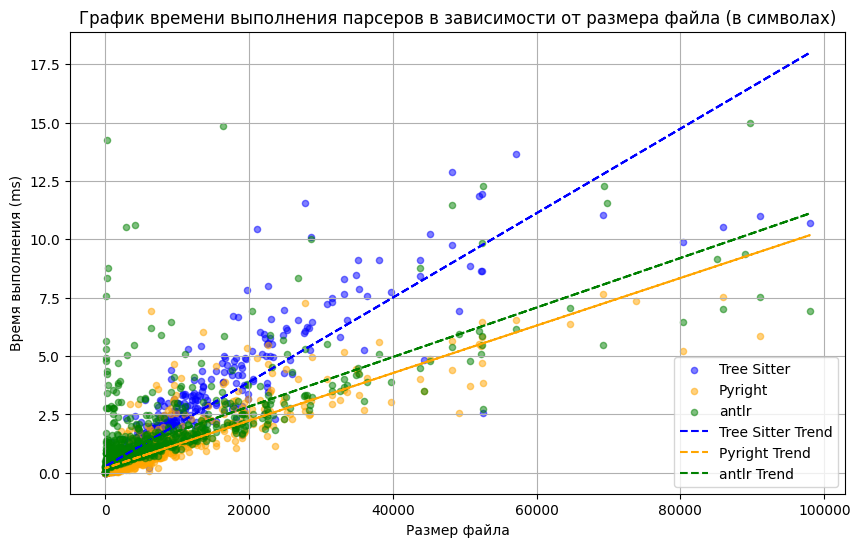

In [9]:
# Чтение данных из JSON-файла
with open('results.json', 'r') as f:
    data = json.load(f)

# Инициализация списков для хранения данных времени выполнения для каждого парсера
tree_sitter_times = []
pyright_times = []
antlr_times = []
sizes = []

# Итерация по данным и заполнение списков времени выполнения и размеров
for item in data:
    tree_sitter_times.append(item['tree-sitterTime'])
    pyright_times.append(item['pyrightTime'])
    antlr_times.append(item['antlrTime'])
    sizes.append(item['size'])

# Функция для удаления выбросов выше 99-го процентиля
def remove_outliers(x, y):
    threshold = np.percentile(y, 99)
    x_filtered = [x[i] for i in range(len(y)) if y[i] <= threshold]
    y_filtered = [y[i] for i in range(len(y)) if y[i] <= threshold]
    return x_filtered, y_filtered

# Применение функции к данным
sizes_tree_sitter, tree_sitter_times_filtered = remove_outliers(sizes, tree_sitter_times)
sizes_pyright, pyright_times_filtered = remove_outliers(sizes, pyright_times)
sizes_antlr, antlr_times_filtered = remove_outliers(sizes, antlr_times)

# Построение графика времени выполнения парсеров в зависимости от размера
plt.figure(figsize=(10, 6))
plt.scatter(sizes_tree_sitter, tree_sitter_times_filtered, label='Tree Sitter', s=20, alpha=0.5, color='blue')
plt.scatter(sizes_pyright, pyright_times_filtered, label='Pyright', s=20, alpha=0.5, color='orange')
plt.scatter(sizes_antlr, antlr_times_filtered, label='antlr', s=20, alpha=0.5, color='green')

# Добавление линий тренда
z_tree_sitter = np.polyfit(sizes_tree_sitter, tree_sitter_times_filtered, 1)
p_tree_sitter = np.poly1d(z_tree_sitter)
plt.plot(sizes, p_tree_sitter(sizes), linestyle='--', color='blue', label='Tree Sitter Trend')

z_pyright = np.polyfit(sizes_pyright, pyright_times_filtered, 1)
p_pyright = np.poly1d(z_pyright)
plt.plot(sizes, p_pyright(sizes), linestyle='--', color='orange', label='Pyright Trend')

z_antlr = np.polyfit(sizes_antlr, antlr_times_filtered, 1)
p_antlr = np.poly1d(z_antlr)
plt.plot(sizes, p_antlr(sizes), linestyle='--', color='green', label='antlr Trend')

plt.xlabel('Размер файла')
plt.ylabel('Время выполнения (ms)')
plt.title('График времени выполнения парсеров в зависимости от размера файла (в символах)')
plt.legend()
plt.grid(True)
plt.show()
